## Paso 1: Cargar datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos
consum_capita = pd.read_excel('consumcapita.xlsx')
esdeveniments = pd.read_excel('esdeveniments.xlsx')
producte = pd.read_excel('producte.xlsx')
regio_geografica = pd.read_excel('regiogeografica.xlsx')
temporada_cultiu = pd.read_excel('temporadacultiu.xlsx')
valor_borsa = pd.read_excel('valorborsa.xlsx')
valor_mercat = pd.read_excel('valormercat.xlsx')

## CABECERAS

In [21]:
print("Consum per capita:")
consum_capita.head()

Consum per capita:


,idPais,nomPais,Quantitat,Data
0,1,Espanya,296,2019-01-01 00:00:00
1,1,Espanya,300,2020-01-01 00:00:00
2,1,Espanya,295,2021-01-01 00:00:00
3,1,Espanya,290,2022-01-01 00:00:00
4,1,Espanya,285,2023-01-01 00:00:00


In [4]:
print("Esdeveniments:")
esdeveniments.head()

Esdeveniments:


,idEsdeveniment,nom,data,tipus
0,1,Incremento de Demanda y Problemas en la Cadena...,2019-01-01 00:00:00,Economico
1,2,Crisis en el Medio Oriente,2020-01-01 00:00:00,Politico
2,3,Brexit,2020-01-31 00:00:00,Politico
3,4,COVID-19,2020-03-11 00:00:00,Economico
4,5,Real Decreto-ley 15/2020 - Medidas Urgentes pa...,2020-04-01 00:00:00,Politico


In [5]:
print("Producte:")
producte.head()

Producte:


,idProducte,idRegio,idTemporada,nom,tipus,pes
0,1,1,5,Trigo,Cereal,1000
1,2,2,5,Cebada,Cereal,1000
2,3,3,5,Maíz,Cereal,1000
3,4,1,1,Limón,Fruta,100
4,5,2,1,Clementina,Fruta,100


In [6]:
print("Regió geogràfica:")
regio_geografica

Regió geogràfica:


,idRegio,nom,clima,poblacio,recursosNaturals,paisosQueAbasta
0,1,Europa del Sur,Mediterráneo,100000000,"Agua, Tierra fértil","España, Italia, Grecia"
1,2,California,Mediterráneo,50000000,"Agua, Tierra fértil",Estados Unidos
2,3,Sudamérica,Tropical,300000000,"Agua, Tierra fértil","Brasil, Argentina, Perú"


In [7]:
print("Temporada de cultiu:")
temporada_cultiu.head()

Temporada de cultiu:


,idTemporada,idProducte,tipus,començamentTemporada,fiTemporada,hemisferi
0,1,4,Invierno,2022-12-01 00:00:00,2023-02-28 00:00:00,Norte y Sur
1,1,5,Invierno,2022-12-01 00:00:00,2023-02-28 00:00:00,Norte y Sur
2,1,6,Invierno,2022-12-01 00:00:00,2023-02-28 00:00:00,Norte y Sur
3,1,9,Invierno,2022-12-01 00:00:00,2023-02-28 00:00:00,Norte y Sur
4,1,24,Invierno,2022-12-01 00:00:00,2023-02-28 00:00:00,Norte y Sur


In [8]:
print("Valor borsa:")
valor_borsa.head()

Valor borsa:


,idCompanyia,nomCompanyia,data,valorAccions
0,1,Greenyard,2019-03-31 00:00:00,3.34
1,1,Greenyard,2019-06-30 00:00:00,3.46
2,1,Greenyard,2019-09-30 00:00:00,2.85
3,1,Greenyard,2020-03-31 00:00:00,3.89
4,1,Greenyard,2020-06-30 00:00:00,5.58


In [9]:
print("Valor mercat:")
valor_mercat = valor_mercat[valor_mercat['preu'] != 0]
# Convert 'data' column to datetime
valor_mercat['data'] = pd.to_datetime(valor_mercat['data'])
valor_mercat

Valor mercat:


,idProducte,data,preu,unitatMesura
0,1,2019-03-31,195.71,€/100kg
1,1,2019-06-30,189.88,€/100kg
2,1,2019-09-30,190.19,€/100kg
3,1,2020-03-31,200.54,€/100kg
4,1,2020-06-30,185.01,€/100kg
...,...,...,...,...
699,41,2022-09-30,38.86,€/100kg
700,41,2023-03-31,51.72,€/100kg
701,41,2023-06-30,49.60,€/100kg
702,41,2023-09-30,34.53,€/100kg


## Paso 2: Definir Objetivos del Análisis


### 2.1 Tendencias Temporales:

¿Cuáles son las tendencias a lo largo del tiempo para los precios de ciertos productos?

¿Existen patrones estacionales en los precios?

In [10]:
# Merge product and price datasets
merged_data = pd.merge(producte, valor_mercat, on='idProducte')
# Convertir la columna de fecha a tipo datetime
merged_data['data'] = pd.to_datetime(merged_data['data'])
merged_data['year'] = merged_data['data'].dt.year


In [11]:
merged_data.head()

,idProducte,idRegio,idTemporada,nom,tipus,pes,data,preu,unitatMesura,year
0,1,1,5,Trigo,Cereal,1000,2019-03-31,195.71,€/100kg,2019
1,1,1,5,Trigo,Cereal,1000,2019-06-30,189.88,€/100kg,2019
2,1,1,5,Trigo,Cereal,1000,2019-09-30,190.19,€/100kg,2019
3,1,1,5,Trigo,Cereal,1000,2020-03-31,200.54,€/100kg,2020
4,1,1,5,Trigo,Cereal,1000,2020-06-30,185.01,€/100kg,2020


In [12]:
def filter_products(data, start_year=2019, end_year=2023):
    # Filtrar datos para los años de interés
    filtered_data = data[(data['year'] >= start_year) | (data['year'] <= end_year)]

    # Crear una tabla pivote para contar los datos por producto y año
    pivot_table = filtered_data.pivot_table(index='nom', columns='year', values='preu', aggfunc='count', fill_value=0)

    # Identificar productos con datos faltantes en algún año (cuenta 0)
    products_to_drop = pivot_table[(pivot_table == 0).any(axis=1)].index

    # Eliminar productos identificados
    cleaned_data = data[~data['nom'].isin(products_to_drop)]

    return cleaned_data
merged_data = filter_products(merged_data)

In [13]:
# Filter data for each product type
cereals_data = merged_data[merged_data['tipus'] == 'Cereal']
fruits_data = merged_data[merged_data['tipus'] == 'Fruta']
vegetables_data = merged_data[merged_data['tipus'] == 'Verdura']

In [14]:
def calculate_price_correlation(data):

    # Convertir la columna 'data' a tipo datetime si aún no está en ese formato
    data['data'] = pd.to_datetime(data['data'])
    
    # Crear una tabla pivote con 'data' como índice, 'nom' como columnas y 'preu' como valores
    pivot_table = data.pivot_table(index='data', columns='nom', values='preu')
    
    # Calcular la matriz de correlación de Pearson entre los precios de los productos
    correlation_matrix = pivot_table.corr(method='pearson')
    
    return correlation_matrix.mean().mean()



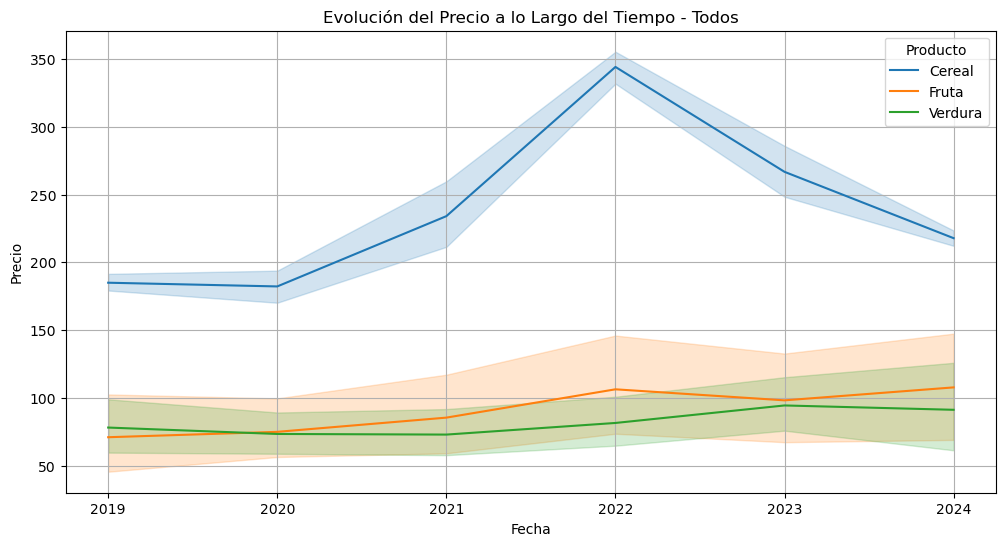

Correlacion del precio: 0.22773239081956703


In [15]:
import warnings
warnings.filterwarnings('ignore')
def plot_price_over_time(data, product_type, hue='nom'):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='year', y='preu', hue=hue, data=data)
    plt.title(f'Evolución del Precio a lo Largo del Tiempo - {product_type}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend(title='Producto')
    plt.grid(True)
    plt.show()

# Crear gráficos para cada tipo de producto
plot_price_over_time(merged_data, 'Todos',hue='tipus')

# Merge product and price datasets
product_price = pd.merge(producte, valor_mercat, on='idProducte')
product_price['year'] = product_price['data'].dt.year
product_price = filter_products(product_price)
print("Correlacion del precio: " + str(calculate_price_correlation((product_price))))


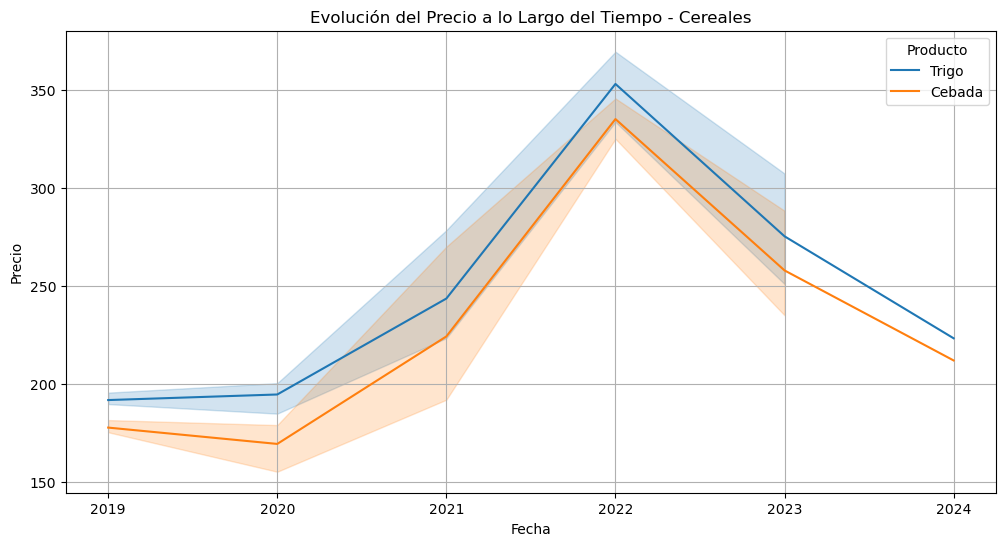

Correlacion del precio de cereales: 0.9971621577715264


In [16]:
plot_price_over_time(cereals_data, 'Cereales')
cereals = producte[producte['tipus'] == 'Cereal']
cereals_price = product_price[product_price['idProducte'].isin(cereals['idProducte'])]
print("Correlacion del precio de cereales: " + str(calculate_price_correlation((cereals_price))))


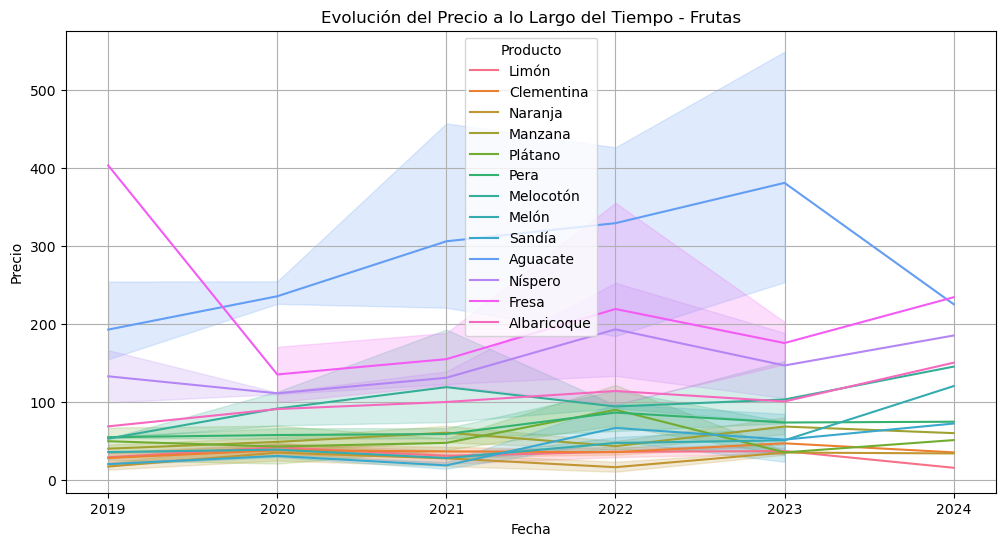

Correlacion del precio de frutas: 0.2191554986844508


In [17]:
plot_price_over_time(fruits_data, 'Frutas')
frutas = producte[producte['tipus'] == 'Fruta']
frutas_price = product_price[product_price['idProducte'].isin(frutas['idProducte'])]
print("Correlacion del precio de frutas: " + str(calculate_price_correlation((frutas_price))))

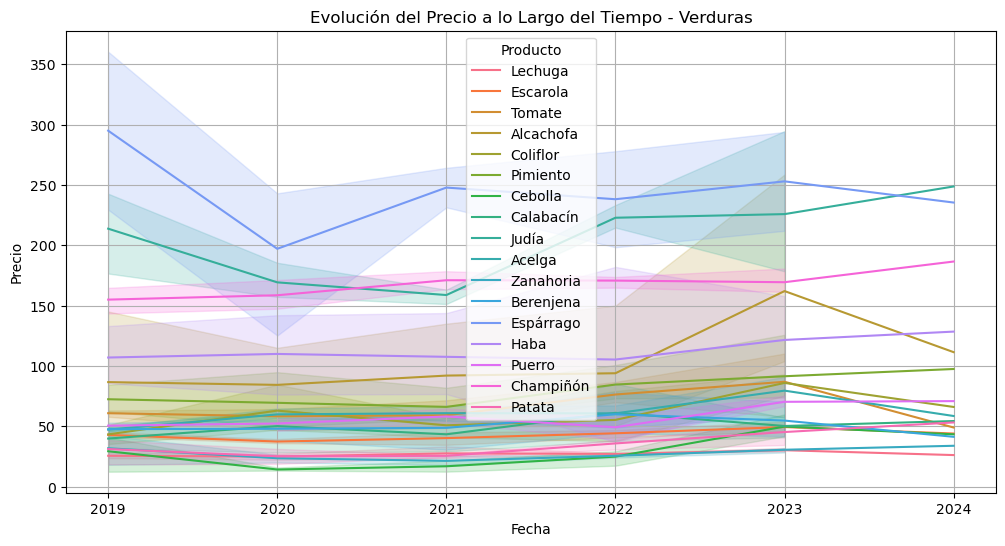

Correlacion del precio de verduras: 0.32074304594244685


In [18]:
plot_price_over_time(vegetables_data, 'Verduras')
verduras = producte[producte['tipus'] == 'Verdura']
vegetables_price = product_price[product_price['idProducte'].isin(verduras['idProducte'])]
print("Correlacion del precio de verduras: " + str(calculate_price_correlation((vegetables_price))))

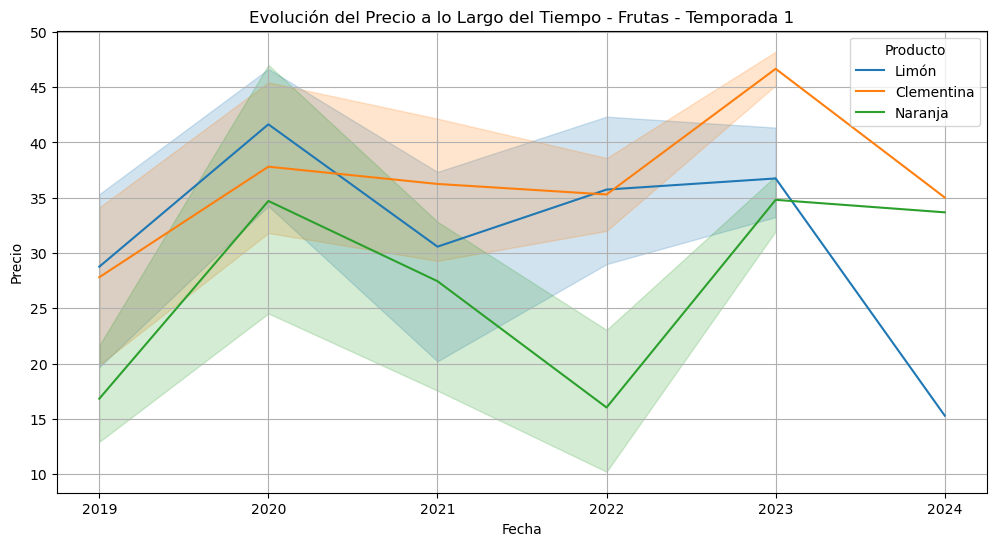

Correlacion del precio de frutas t1: 0.6376868258054328


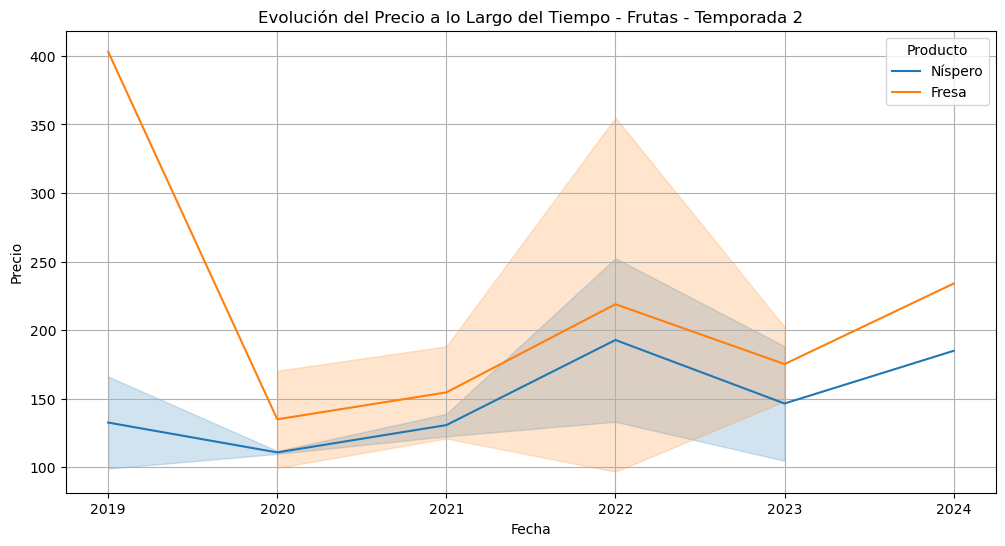

Correlacion del precio de frutas t2: 0.8358099685268714


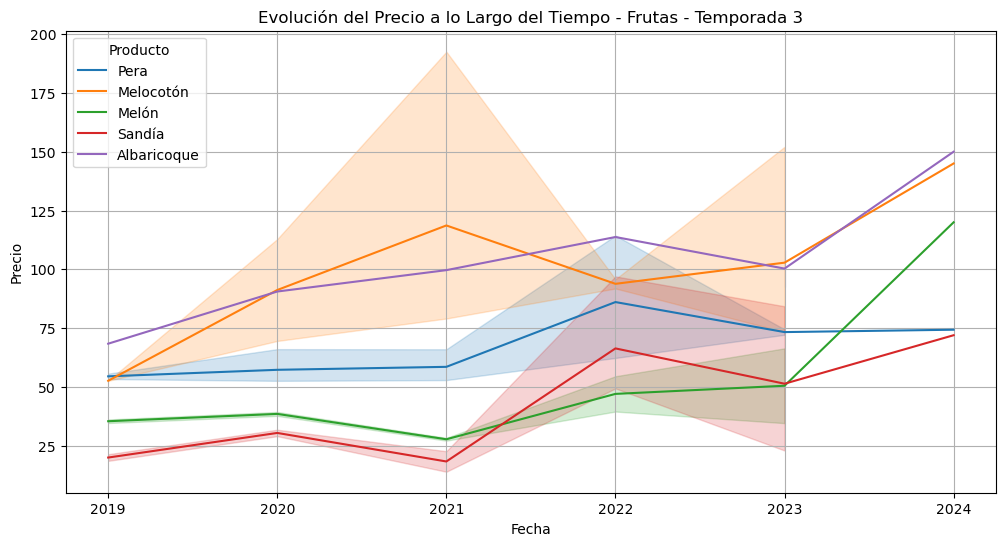

Correlacion del precio de frutas t3: 0.7053686847283884


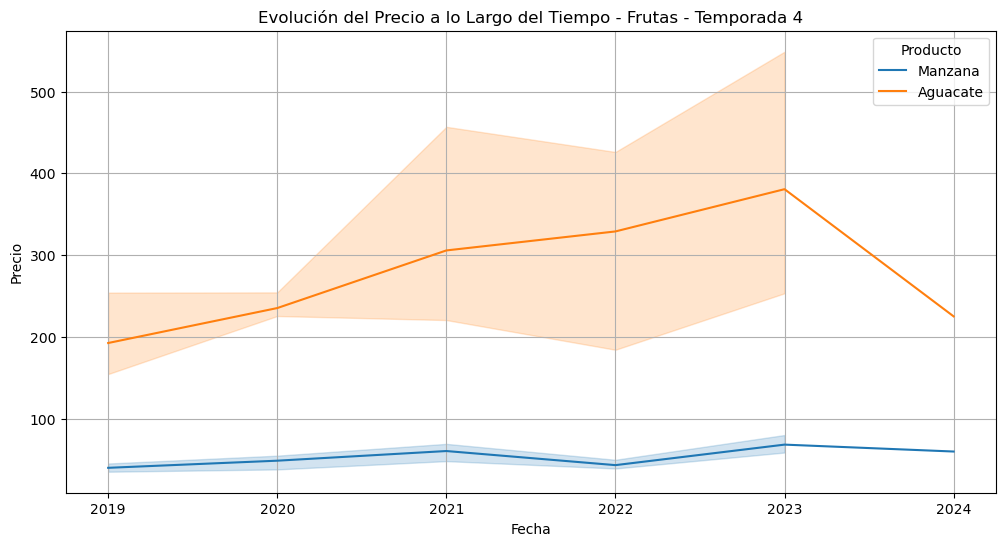

Correlacion del precio de frutas t4: 0.8011864506449405


In [19]:
frutas_t1 = fruits_data[fruits_data['idTemporada'] == 1]
frutas_t2 = fruits_data[fruits_data['idTemporada'] == 2]
frutas_t3 = fruits_data[fruits_data['idTemporada'] == 3]
frutas_t4 = fruits_data[fruits_data['idTemporada'] == 4]

plot_price_over_time(frutas_t1, 'Frutas - Temporada 1')
print("Correlacion del precio de frutas t1: " + str(calculate_price_correlation((frutas_t1))))
plot_price_over_time(frutas_t2, 'Frutas - Temporada 2')
print("Correlacion del precio de frutas t2: " + str(calculate_price_correlation((frutas_t2))))
plot_price_over_time(frutas_t3, 'Frutas - Temporada 3')
print("Correlacion del precio de frutas t3: " + str(calculate_price_correlation((frutas_t3))))
plot_price_over_time(frutas_t4, 'Frutas - Temporada 4')
print("Correlacion del precio de frutas t4: " + str(calculate_price_correlation((frutas_t4))))

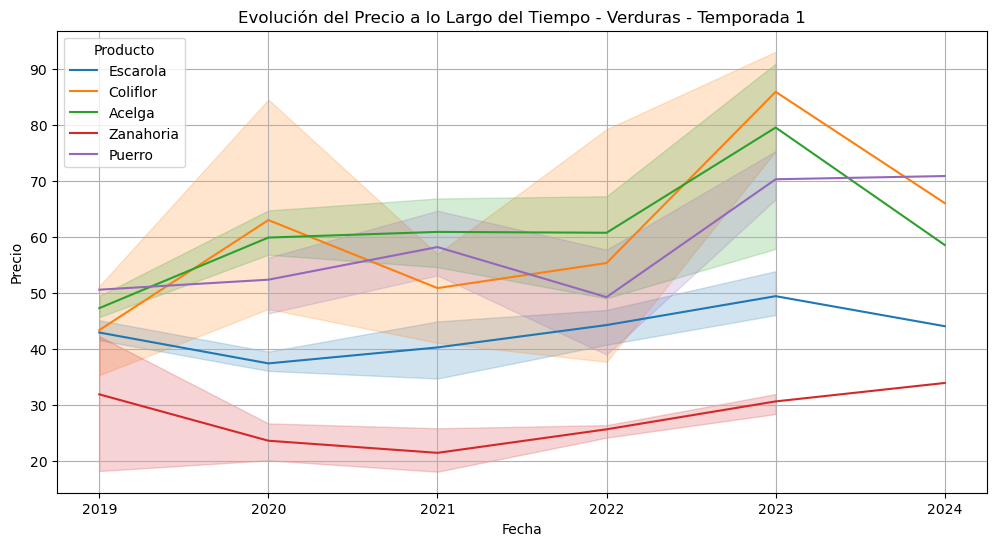

Correlacion del precio de verduras t1: 0.5432830163831364


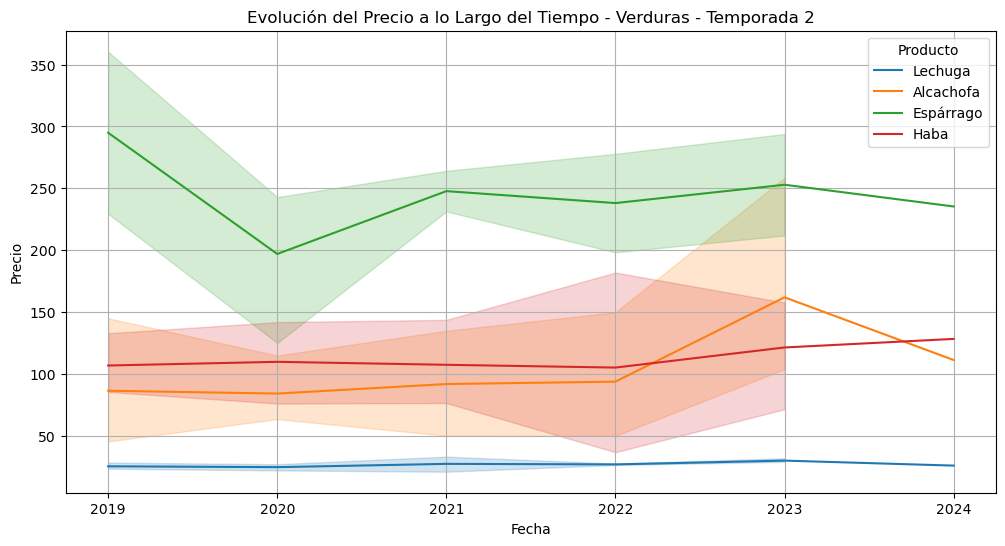

Correlacion del precio de verduras t2: 0.45266740313917186


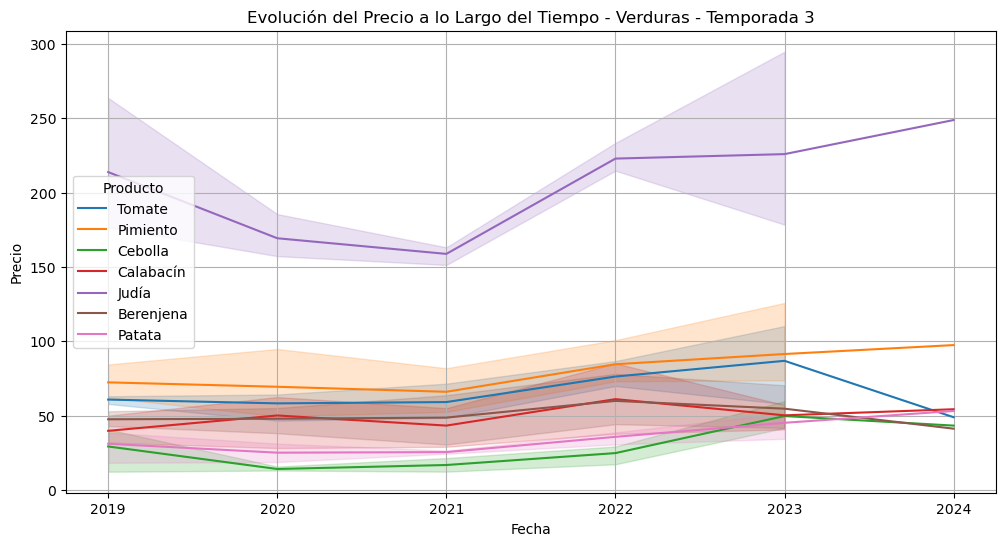

Correlacion del precio de verduras t3: 0.5482255953345716


In [20]:
vegetables_t1 = vegetables_data[vegetables_data['idTemporada'] == 1]
vegetables_t2 = vegetables_data[vegetables_data['idTemporada'] == 2]
vegetables_t3 = vegetables_data[vegetables_data['idTemporada'] == 3]
vegetables_t4 = vegetables_data[vegetables_data['idTemporada'] == 4]

plot_price_over_time(vegetables_t1, 'Verduras - Temporada 1')
vegetables_t1 = vegetables_data[vegetables_data['idTemporada'] == 1]
print("Correlacion del precio de verduras t1: " + str(calculate_price_correlation((vegetables_t1))))
plot_price_over_time(vegetables_t2, 'Verduras - Temporada 2')
vegetables_t2 = vegetables_data[vegetables_data['idTemporada'] == 2]
print("Correlacion del precio de verduras t2: " + str(calculate_price_correlation((vegetables_t2))))
plot_price_over_time(vegetables_t3, 'Verduras - Temporada 3')
vegetables_t3 = vegetables_data[vegetables_data['idTemporada'] == 3]
print("Correlacion del precio de verduras t3: " + str(calculate_price_correlation((vegetables_t3))))


### Explorando las Correlaciones entre los Precios de los Productos

Observamos una notable correlación entre los precios de los productos de cereales básicos. No los hemos separado por temporadas ya que de base, ya pertenecen a la misma, los datos revelan una fuerte correlación entre ellos.

Por otro lado, al analizar los precios de las frutas, inicialmente no se percibe una correlación evidente. Sin embargo, al segmentar los datos por temporadas, se revela una correlación más significativa, lo que sugiere que esta estadística ofrece una visión más precisa de la relación entre los precios.

En el caso de las verduras, al observar los datos en su totalidad, al igual que en las frutas no se percibe una correlación evidente. Sin embargo, al examinar los precios por temporadas, se observa una mejora en la correlación, aunque no tan marcada como en los otros grupos de productos.




### 2.2 Impacto de Eventos Políticos:

¿Cómo afectan los eventos políticos relevantes a los precios de los productos?

¿Hay ciertos tipos de eventos que tienen un mayor impacto en los precios?


### 2.3 Comparaciones de Productos:

¿Qué productos son los más sensibles a los cambios en eventos políticos?

¿Hay productos cuyo precio se mantiene relativamente estable independientemente de los eventos externos?

### 2.4 Análisis Regional:

¿Existen diferencias en la variabilidad de precios entre diferentes países o regiones?

¿Qué regiones experimentan la mayor volatilidad de precios y por qué?